# Workout Classification - Tensorflow



## Menginport Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Mendownload Dataset yang diperluhkan

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/sample_data/dumbcurl.csv"; # change this
path_other = "/content/sample_data/dance.csv"; # change this
name_class = "Dumbell Curl" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,112.377531,114.438927,120.172559,110.036481,106.295616,109.196446,127.555837,116.746633,98.360780,114.173635,...,82.164404,240.338830,126.560438,293.537180,84.491766,291.597150,154.230640,256.871930,51.544087,259.526821
1,112.147663,114.544312,120.011985,110.104903,105.965708,109.338413,127.585899,116.514673,98.219940,114.156433,...,82.829093,241.004276,125.055310,293.853853,84.124621,294.432802,153.875621,261.661189,52.290290,265.010345
2,112.149455,114.542940,120.012748,110.103487,105.966298,109.339851,127.588636,116.514460,98.222546,114.162356,...,82.851289,241.018664,125.111777,293.850005,84.142644,294.431959,153.887696,261.680513,52.290629,265.018104
3,111.731133,114.857711,119.401521,110.318029,105.565399,109.673301,127.210118,116.504501,97.746953,114.508165,...,82.077370,241.770786,125.273477,293.812164,76.928505,289.315130,156.330389,257.446259,54.039714,266.118077
4,111.731132,114.857705,119.401520,110.318024,105.565399,109.673296,127.210117,116.504496,97.746953,114.508160,...,82.077370,241.770781,125.273477,293.812159,76.928505,289.315124,156.330389,257.446254,54.039713,266.118072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,112.536203,52.346783,117.297229,48.493329,107.352931,47.591423,121.610414,54.276638,99.326281,53.289275,...,102.911424,133.682302,130.600297,204.586165,107.499207,207.658243,131.864434,273.916596,116.478918,273.614625
1222,113.060436,52.673663,117.665530,49.025895,108.157115,47.957140,122.025777,54.706661,101.094921,53.583925,...,102.594614,133.779361,132.736304,203.747384,105.914154,207.172183,137.560775,273.481378,111.143998,269.556150
1223,113.165277,52.600727,117.740673,49.029771,108.343622,47.872441,121.963771,54.659518,101.167944,53.394658,...,102.701275,134.211100,132.859451,203.614132,106.881457,207.466835,137.377902,273.741549,110.536895,270.061454
1224,113.286737,53.146124,118.778712,49.150242,108.745505,48.498898,124.219561,54.992836,102.314106,54.173826,...,102.579423,133.672479,133.238013,204.493589,105.817292,208.333894,138.567846,274.654734,109.001443,272.206673


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,315.824413,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,287.639108,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,308.643058,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


**Important**: Check first, the number of data each class is balance or not.

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,112.377531,114.438927,120.172559,110.036481,106.295616,109.196446,127.555837,116.746633,98.360780,114.173635,...,240.338830,126.560438,293.537180,84.491766,291.597150,154.230640,256.871930,51.544087,259.526821,Dumbell Curl
1,112.147663,114.544312,120.011985,110.104903,105.965708,109.338413,127.585899,116.514673,98.219940,114.156433,...,241.004276,125.055310,293.853853,84.124621,294.432802,153.875621,261.661189,52.290290,265.010345,Dumbell Curl
2,112.149455,114.542940,120.012748,110.103487,105.966298,109.339851,127.588636,116.514460,98.222546,114.162356,...,241.018664,125.111777,293.850005,84.142644,294.431959,153.887696,261.680513,52.290629,265.018104,Dumbell Curl
3,111.731133,114.857711,119.401521,110.318029,105.565399,109.673301,127.210118,116.504501,97.746953,114.508165,...,241.770786,125.273477,293.812164,76.928505,289.315130,156.330389,257.446259,54.039714,266.118077,Dumbell Curl
4,111.731132,114.857705,119.401520,110.318024,105.565399,109.673296,127.210117,116.504496,97.746953,114.508160,...,241.770781,125.273477,293.812159,76.928505,289.315124,156.330389,257.446254,54.039713,266.118072,Dumbell Curl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,112.536203,52.346783,117.297229,48.493329,107.352931,47.591423,121.610414,54.276638,99.326281,53.289275,...,133.682302,130.600297,204.586165,107.499207,207.658243,131.864434,273.916596,116.478918,273.614625,Dumbell Curl
1222,113.060436,52.673663,117.665530,49.025895,108.157115,47.957140,122.025777,54.706661,101.094921,53.583925,...,133.779361,132.736304,203.747384,105.914154,207.172183,137.560775,273.481378,111.143998,269.556150,Dumbell Curl
1223,113.165277,52.600727,117.740673,49.029771,108.343622,47.872441,121.963771,54.659518,101.167944,53.394658,...,134.211100,132.859451,203.614132,106.881457,207.466835,137.377902,273.741549,110.536895,270.061454,Dumbell Curl
1224,113.286737,53.146124,118.778712,49.150242,108.745505,48.498898,124.219561,54.992836,102.314106,54.173826,...,133.672479,133.238013,204.493589,105.817292,208.333894,138.567846,274.654734,109.001443,272.206673,Dumbell Curl


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919,other
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006,other
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,112.377531,114.438927,120.172559,110.036481,106.295616,109.196446,127.555837,116.746633,98.360780,114.173635,...,240.338830,126.560438,293.537180,84.491766,291.597150,154.230640,256.871930,51.544087,259.526821,Dumbell Curl
1,112.147663,114.544312,120.011985,110.104903,105.965708,109.338413,127.585899,116.514673,98.219940,114.156433,...,241.004276,125.055310,293.853853,84.124621,294.432802,153.875621,261.661189,52.290290,265.010345,Dumbell Curl
2,112.149455,114.542940,120.012748,110.103487,105.966298,109.339851,127.588636,116.514460,98.222546,114.162356,...,241.018664,125.111777,293.850005,84.142644,294.431959,153.887696,261.680513,52.290629,265.018104,Dumbell Curl
3,111.731133,114.857711,119.401521,110.318029,105.565399,109.673301,127.210118,116.504501,97.746953,114.508165,...,241.770786,125.273477,293.812164,76.928505,289.315130,156.330389,257.446259,54.039714,266.118077,Dumbell Curl
4,111.731132,114.857705,119.401520,110.318024,105.565399,109.673296,127.210117,116.504496,97.746953,114.508160,...,241.770781,125.273477,293.812159,76.928505,289.315124,156.330389,257.446254,54.039713,266.118072,Dumbell Curl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
12357,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
12358,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
12359,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,112.377531,114.438927,120.172559,110.036481,106.295616,109.196446,127.555837,116.746633,98.360780,114.173635,...,82.164404,240.338830,126.560438,293.537180,84.491766,291.597150,154.230640,256.871930,51.544087,259.526821
1,112.147663,114.544312,120.011985,110.104903,105.965708,109.338413,127.585899,116.514673,98.219940,114.156433,...,82.829093,241.004276,125.055310,293.853853,84.124621,294.432802,153.875621,261.661189,52.290290,265.010345
2,112.149455,114.542940,120.012748,110.103487,105.966298,109.339851,127.588636,116.514460,98.222546,114.162356,...,82.851289,241.018664,125.111777,293.850005,84.142644,294.431959,153.887696,261.680513,52.290629,265.018104
3,111.731133,114.857711,119.401521,110.318029,105.565399,109.673301,127.210118,116.504501,97.746953,114.508165,...,82.077370,241.770786,125.273477,293.812164,76.928505,289.315130,156.330389,257.446259,54.039714,266.118077
4,111.731132,114.857705,119.401520,110.318024,105.565399,109.673296,127.210117,116.504496,97.746953,114.508160,...,82.077370,241.770781,125.273477,293.812159,76.928505,289.315124,156.330389,257.446254,54.039713,266.118072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
12357,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
12358,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
12359,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


In [ ]:
y

0        Dumbell Curl
1        Dumbell Curl
2        Dumbell Curl
3        Dumbell Curl
4        Dumbell Curl
             ...     
12356           other
12357           other
12358           other
12359           other
12360           other
Name: class, Length: 12361, dtype: object

In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.175590,0.317886,0.187770,0.305657,0.166087,0.303323,0.199306,0.324296,0.153689,0.317149,...,0.128382,0.667608,0.197751,0.815381,0.132018,0.809992,0.240985,0.713533,0.080538,0.720908
1,0.175231,0.318179,0.187519,0.305847,0.165571,0.303718,0.199353,0.323652,0.153469,0.317101,...,0.129420,0.669456,0.195399,0.816261,0.131445,0.817869,0.240431,0.726837,0.081704,0.736140
2,0.175234,0.318175,0.187520,0.305843,0.165572,0.303722,0.199357,0.323651,0.153473,0.317118,...,0.129455,0.669496,0.195487,0.816250,0.131473,0.817867,0.240450,0.726890,0.081704,0.736161
3,0.174580,0.319049,0.186565,0.306439,0.164946,0.304648,0.198766,0.323624,0.152730,0.318078,...,0.128246,0.671586,0.195740,0.816145,0.120201,0.803653,0.244266,0.715128,0.084437,0.739217
4,0.174580,0.319049,0.186565,0.306439,0.164946,0.304648,0.198766,0.323624,0.152730,0.318078,...,0.128246,0.671586,0.195740,0.816145,0.120201,0.803653,0.244266,0.715128,0.084437,0.739217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,0.397069,0.472026,0.354805,0.456920,0.368854,0.512198,0.318143,0.456278,0.338126,0.514401,...,0.523825,0.517792,0.620173,0.280283,0.656038,0.560741,0.724772,0.167173,0.765664,0.611400
12357,0.366799,0.502488,0.292235,0.500039,0.315613,0.539177,0.303860,0.467973,0.319669,0.538732,...,0.526401,0.523812,0.614430,0.288277,0.655614,0.567338,0.723561,0.167249,0.761635,0.615793
12358,0.474218,0.516747,0.439097,0.468862,0.400807,0.547346,0.346177,0.455086,0.383785,0.534549,...,0.528779,0.535067,0.616438,0.283088,0.652912,0.571946,0.721766,0.168147,0.761215,0.617634
12359,0.355025,0.484035,0.281769,0.492948,0.295236,0.527066,0.291845,0.470410,0.300212,0.529335,...,0.517393,0.519048,0.616863,0.277975,0.645725,0.558256,0.729836,0.159471,0.761370,0.611801


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

### Membagi Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 11124
The number of test data X is: 1237
The number of train data y is : 11124
The number of test daya y is : 1237
The total dataset is : 12361


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2240      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=50)

Epoch 1/50
174/174 [==============================] - 2s 4ms/step - loss: 0.2824 - accuracy: 0.8931 - val_loss: 0.0805 - val_accuracy: 0.9062
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9289 - val_loss: 0.0623 - val_accuracy: 0.9992
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9917 - val_loss: 0.0361 - val_accuracy: 0.9992
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9949 - val_loss: 0.0217 - val_accuracy: 0.9992
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9963 - val_loss: 0.0097 - val_accuracy: 0.9992
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9966 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 7/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9971 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 

## Visualisasi Accuracy & Loss

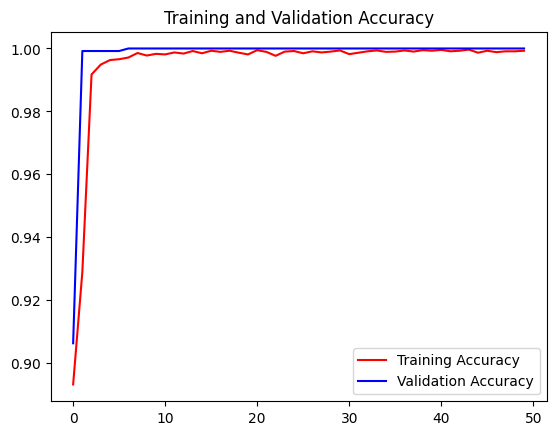

<Figure size 640x480 with 0 Axes>

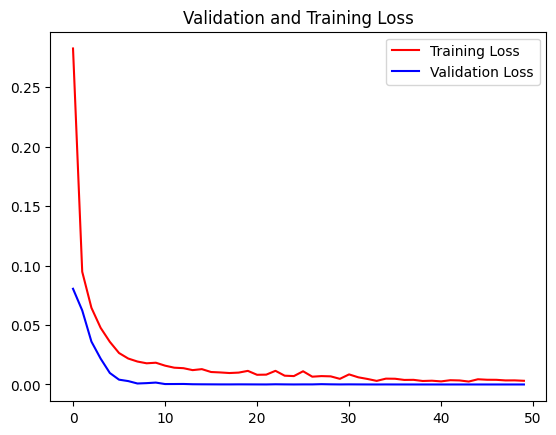

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.0911031722571352e-06
Test accuracy: 1.0


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
2987,0.550804,0.239534,0.560536,0.218497,0.54428,0.205848,0.560299,0.172769,0.517133,0.131462,...,0.431476,0.502277,0.509397,0.743993,0.50875,0.776666,0.462361,0.901184,0.46755,0.933806


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['Dumbell Curl', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- dumbell curl --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 63ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
Dumbell Curl


## Export Model

In [ ]:
# Download this file for backup
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)


In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 34)
      name: serving_default_input_2:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_7'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 2)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-06-12 07:14:30.937720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)


In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_2': TensorSpec(shape=(None, 34), dtype=tf.float32, name='input_2')})
{'dense_7': TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_7')}


Convert to TFLITE


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>